In [54]:
import numpy as np
import os
from PIL import Image
import struct
import scipy
import scipy.misc
import scipy.cluster
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline

In [14]:
#Absolute folder of images
im_dir = '/Users/noon/Pictures/Pictures by me/'
os.chdir(im_dir)

In [15]:
# Access all PNG files in directory
allfiles=os.listdir(im_dir)
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]

In [21]:


# Assuming all images are the same size, get dimensions of first image
max_w = max(Image.open(im).size[0] for im in imlist)
max_h = max(Image.open(im).size[1] for im in imlist)
print max_w, max_h
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((max_h,max_w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(Image.open(im),dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(numpy.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()


6000 9000


ValueError: operands could not be broadcast together with shapes (9000,6000,3) (600,800,3) 

In [64]:
def get_average_color(im_fname, num_clusters=5,resize_w=150):
    try:
        print 'reading image ' + im_fname
        im = Image.open(im_fname)
        w, h = im.size
        ratio = w*1.0/500
        new_w = int(round(w/ratio))
        new_h = int(round(h/ratio))
        im = im.resize((new_w, new_h))     
        ar = scipy.misc.fromimage(im)
        shape = ar.shape
        ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype('float')
        codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
        vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
        counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
        index_max = scipy.argmax(counts)                    # find most frequent
        peak = codes[index_max]
        peak = peak.astype(int)
        colour = ''.join(chr(c) for c in peak).encode('hex')[0:6]
        print 'most frequent is %s (#%s)' % (peak, colour)
        return colour
    except IndexError as e:
        print e
        return 'ffffff'

In [65]:
# Access all PNG files in directory
DRAW = False
allfiles=os.listdir(im_dir)
imlist = []
for filename in allfiles:
    if filename[-4:] in [".png",".PNG"] or filename[-4:] in [".jpg",".JPG"] or filename[-5:] in [".jpeg",".JPEG"]:
        imlist.append(filename)
hexes = []
for im in imlist:
    hexcode = get_average_color(im)
    hexes.append(hexcode)
    if DRAW:
        fig1 = plt.figure(figsize=(1,1))
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(
            patches.Rectangle(
                (0, 0),   # (x,y)
                1,          # width
                1,          # height
                facecolor = '#'+str(hexcode),
                edgecolor = "none"
            )
        )
        plt.axis('off')
        plt.show()

reading image "ART".png
most frequent is [254 254 254] (#fefefe)
reading image 17th century population growth.png
most frequent is [253 253 254] (#fdfdfe)
reading image ?_____?.png
most frequent is [ 18 192 158 255] (#12c09e)
reading image ab.jpg
most frequent is [41 55 84] (#293754)
reading image accidents.jpg
most frequent is [6 2 1] (#060201)
reading image ahappy 39th bird.png
most frequent is [254 254 254] (#fefefe)
reading image alex and his fucking guitar.png
most frequent is [0 0 0 0] (#000000)
reading image alicia and capy small.png
most frequent is [0 0 0 0] (#000000)
reading image alicia and capy.png
most frequent is [0 0 0 0] (#000000)
reading image alicia.png
most frequent is [211 199 192] (#d3c7c0)
reading image amazing.png
most frequent is [234 238 244] (#eaeef4)
reading image amnesinoon.png
most frequent is [10  6 15] (#0a060f)
reading image ann eats poop.png
most frequent is [209  71  55] (#d14737)
reading image ann falls.png
most frequent is [0 0 0 0] (#000000)
reading

In [67]:
totalsquares = len(hexes)
side = int(np.ceil(np.sqrt(totalsquares)))
print totalsquares, side

256 16


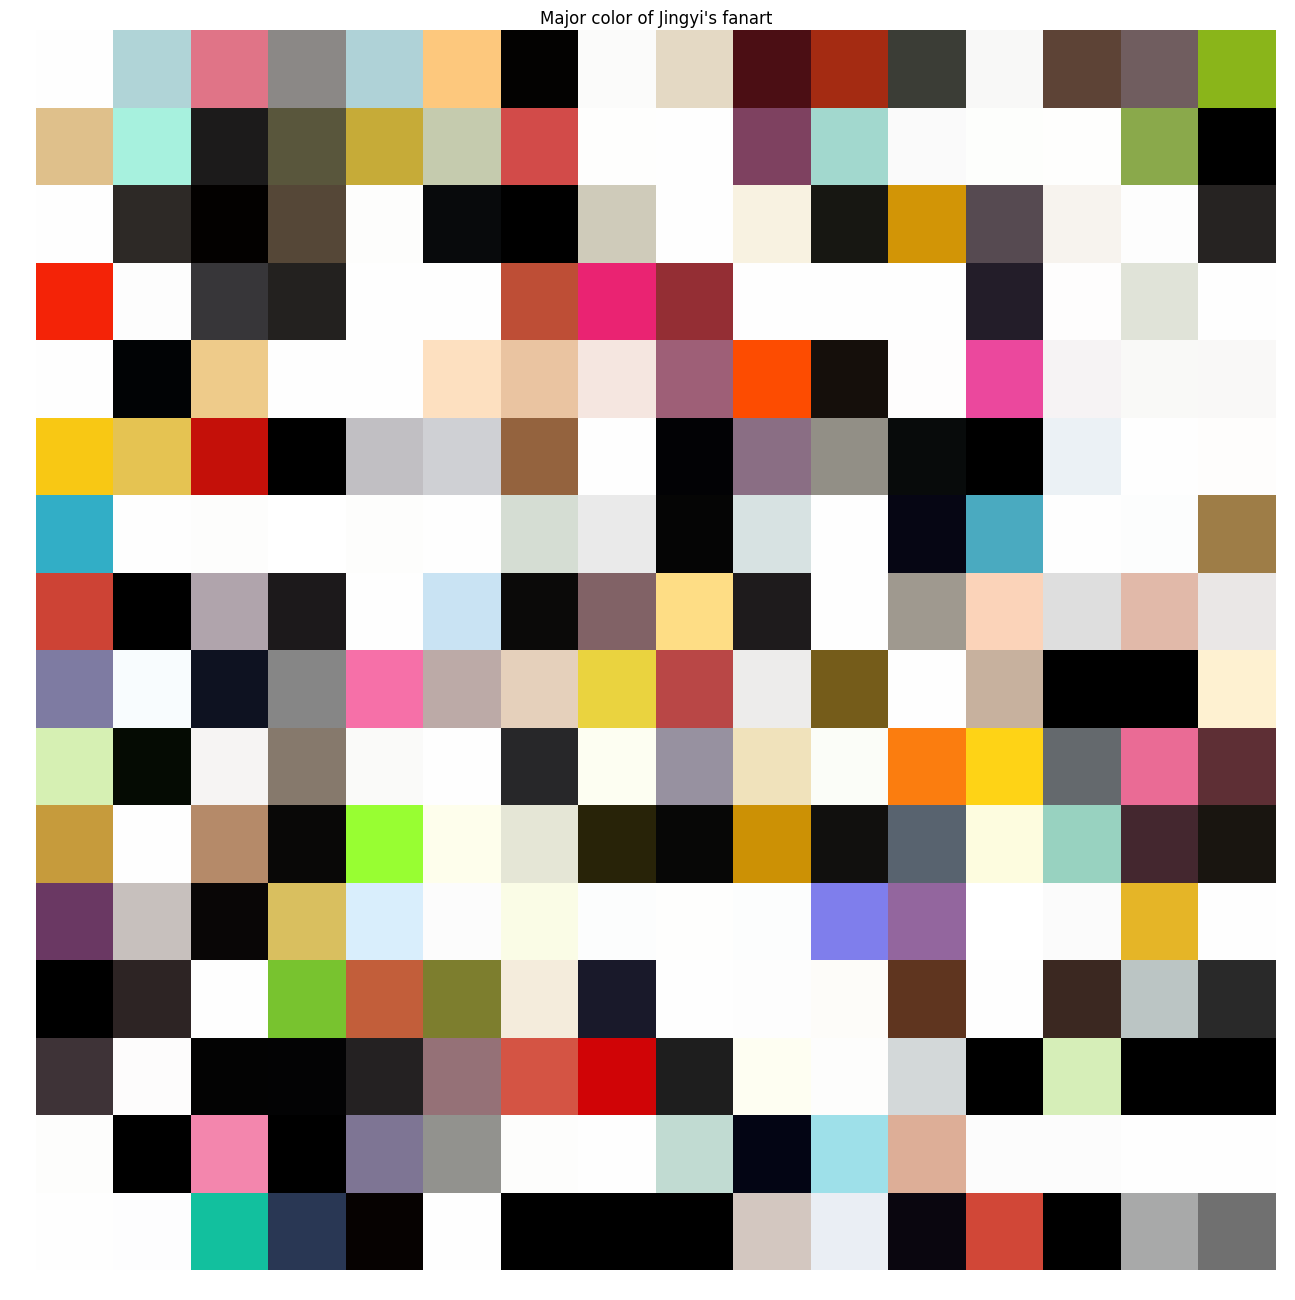

In [71]:
totalsquares = len(hexes)
side = int(np.ceil(np.sqrt(totalsquares)))

fig = plt.figure(figsize=(side,side))
ax1 = fig.add_subplot(111, aspect='equal')

i = 0
j = 0
patchlen = 1.0/side
for hexcolor in hexes:
    ax1.add_patch(
        patches.Rectangle(
            (i, j),     # (x,y)
            patchlen,          # width
            patchlen,          # height
            facecolor = '#'+str(hexcolor),
            edgecolor = "none"
        )
    )
    i += patchlen
    if i >= 1:
        i = 0
        j += patchlen

plt.title("Major color of Jingyi's fanart")
plt.axis('off')
plt.show()
    
#fixes to maybe make - white/black handling, get second color
#order by hue? 
# took about 15m for 256 images

In [69]:
print hexes

['fefefe', 'fdfdfe', '12c09e', '293754', '060201', 'fefefe', '000000', '000000', '000000', 'd3c7c0', 'eaeef4', '0a060f', 'd14737', '000000', 'a8a9a9', '707070', 'fdfdfc', '000000', 'f386ad', '000000', '7e7594', '92928e', 'fdfdfc', 'fefefe', 'c1dbd2', '030514', '9ee0e9', 'ddae97', 'fcfcfc', 'fcfcfc', 'fefefe', 'fefefe', '3e3337', 'fdfcfc', '030303', '030304', '242122', '957177', 'd45444', 'd00406', '1e1e1e', 'fefef2', 'fdfdfc', 'd3d8d9', '000000', 'd6eeb8', '000000', '000000', '000000', '2d2424', 'fefefe', '78c32f', 'c25e3a', '7d7e2e', 'f4ecdc', '19192a', 'fefefe', 'fdfdfd', 'fdfcf9', '5f351f', 'fefefe', '3b2821', 'bbc5c4', '292929', '6a3863', 'c7c0bd', '090606', 'd9bf5f', 'd9eefc', 'fcfcfc', 'fafce6', 'fcfdfd', 'fefefd', 'fcfdfd', '7f7eec', '93669e', 'ffffff', 'fbfbfb', 'e5b527', 'fefefe', 'c69b3c', 'fefefe', 'b58a69', '090807', '98fe32', 'fefeec', 'e5e6d6', '282308', '070706', 'cc9105', '11100e', '58636f', 'fdfcdf', '98d2c0', '44272f', '191510', 'd6f0b3', '050b03', 'f6f4f3', '86796c',

In [43]:
#getting avg color of image

NUM_CLUSTERS = 5
resize_w = 500

print 'reading image'
im = Image.open('runt in the sink.png')
w, h = im.size
ratio = w*1.0/500
new_w = int(round(w/ratio))
new_h = int(round(h/ratio))
print new_w, new_h
im = im.resize((new_w, new_h))     
ar = scipy.misc.fromimage(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype('float')
print 'finding clusters'
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print 'cluster centres:\n', codes

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
peak = peak.astype(int)
print 'peaks are ', peak

colour = ''.join(chr(c) for c in peak).encode('hex')[0:6]
print 'most frequent is %s (#%s)' % (peak, colour)

reading image
500 292
finding clusters
cluster centres:
[[ 253.30979221  224.40719174  192.66885654  255.        ]
 [ 221.44868841  109.40371322  128.0340748   255.        ]
 [ 123.12611687  152.65582559  158.5630361   255.        ]
 [ 215.46752242  178.64131612  182.19080575  255.        ]
 [ 254.42946941  242.0363439   228.59973142  255.        ]]
peaks are  [253 224 192 255]
most frequent is [253 224 192 255] (#fde0c0f)
